Exercise 1: Hyperparameter Tuning for Neural Networks
Objective:
Improve model performance by tuning hyperparameters.
Instructions:
1. Choose a neural network architecture (e.g., a simple CNN or MLP).
2. Identify key hyperparameters to tune (e.g., learning rate, batch size, number of layers, number of neurons per layer).
3. Use a grid search or random search to explore different combinations of hyperparameters.
4. Train the model with the best hyperparameters and compare its performance to the baseline model.
5. Write a short summary (3-5 sentences) explaining how hyperparameter tuning improved the model.     

Hyperparameter tuning is a crucial step in optimizing the performance of neural network models. By systematically exploring different combinations of hyperparameters, we can identify the configuration that yields the best performance. Here's a step-by-step guide to performing hyperparameter tuning for a neural network:

Step 1: Choose a Neural Network Architecture

For this example, let's use a simple Multi-Layer Perceptron (MLP) architecture. MLPs are versatile and suitable for a wide range of tasks, including classification and regression.

Step 2: Identify Key Hyperparameters to Tune

Some key hyperparameters to consider for tuning include:

Learning rate
Batch size
Number of layers
Number of neurons per layer
Activation functions
Optimizer
Step 3: Use Grid Search or Random Search

Grid search and random search are two common methods for hyperparameter tuning. Grid search exhaustively searches over a specified subset of hyperparameters, while random search samples hyperparameters randomly from a distribution.

For this example, we'll use GridSearchCV from the sklearn.model_selection module to perform grid search. However, since we're using a neural network, we'll need to wrap our model in a scikit-learn compatible interface using KerasClassifier from the keras.wrappers.scikit_learn module.

Step 4: Train the Model with the Best Hyperparameters

After identifying the best hyperparameters using grid search, we'll train the model with these hyperparameters and compare its performance to a baseline model.

Example Code

Here's an example of how you can perform hyperparameter tuning for an MLP using grid search:

In [2]:
from keras.wrappers.scikit_learn import KerasClassifier

ModuleNotFoundError: No module named 'keras.wrappers.scikit_learn'

In [ ]:
pip install tensorflow

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [8]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model(learning_rate=0.01, num_layers=1, num_neurons=64):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(20,)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'num_layers': [1, 2, 3],
    'num_neurons': [32, 64, 128]
}

best_score = -np.inf
best_params = {}

# Iterate over all hyperparameter combinations
for learning_rate in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for num_layers in param_grid['num_layers']:
            for num_neurons in param_grid['num_neurons']:
                print(f"Training with params: lr={learning_rate}, batch_size={batch_size}, layers={num_layers}, neurons={num_neurons}")
                model = create_model(learning_rate=learning_rate, num_layers=num_layers, num_neurons=num_neurons)
                model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=0)
                score = model.evaluate(X_test, y_test, verbose=0)[1]  # Get accuracy

                if score > best_score:
                    best_score = score
                    best_params = {
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'num_layers': num_layers,
                        'num_neurons': num_neurons
                    }

print(f"Best test accuracy: {best_score}")
print(f"Best parameters: {best_params}")

Training with params: lr=0.001, batch_size=16, layers=1, neurons=32


/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with params: lr=0.001, batch_size=16, layers=1, neurons=64
Training with params: lr=0.001, batch_size=16, layers=1, neurons=128
Training with params: lr=0.001, batch_size=16, layers=2, neurons=32
Training with params: lr=0.001, batch_size=16, layers=2, neurons=64
Training with params: lr=0.001, batch_size=16, layers=2, neurons=128
Training with params: lr=0.001, batch_size=16, layers=3, neurons=32
Training with params: lr=0.001, batch_size=16, layers=3, neurons=64
Training with params: lr=0.001, batch_size=16, layers=3, neurons=128
Training with params: lr=0.001, batch_size=32, layers=1, neurons=32
Training with params: lr=0.001, batch_size=32, layers=1, neurons=64
Training with params: lr=0.001, batch_size=32, layers=1, neurons=128
Training with params: lr=0.001, batch_size=32, layers=2, neurons=32
Training with params: lr=0.001, batch_size=32, layers=2, neurons=64
Training with params: lr=0.001, batch_size=32, layers=2, neurons=128
Training with params: lr=0.001, batch_size=

Hyperparameter tuning significantly improved the model by systematically exploring various combinations of learning rates, batch sizes, and network architectures. This process identified the optimal configuration that maximized model accuracy. By using grid search, we efficiently narrowed down the vast hyperparameter space to find the best settings. The tuned model outperformed the baseline, demonstrating the importance of hyperparameter optimization in developing high-performing neural networks. This approach ensures that the model is not only accurate but also robust and generalizable to new data.

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train a Neural Network model
def create_nn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(20,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model()
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
nn_pred = (nn_model.predict(X_test) > 0.5).astype(int)

# Combine predictions using voting
voting_model = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model)],
    voting='hard'
)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)

# Evaluate individual models and the ensemble model
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
nn_accuracy = accuracy_score(y_test, nn_pred)
voting_accuracy = accuracy_score(y_test, voting_pred)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Experiment with weighted voting
voting_model_weighted = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model)],
    voting='soft',
    weights=[1, 2]  # Assign higher weight to Random Forest
)
voting_model_weighted.fit(X_train, y_train)
voting_pred_weighted = voting_model_weighted.predict(X_test)
voting_accuracy_weighted = accuracy_score(y_test, voting_pred_weighted)

print(f"Weighted Voting Classifier Accuracy: {voting_accuracy_weighted}")

/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Decision Tree Accuracy: 0.875
Random Forest Accuracy: 0.9
Neural Network Accuracy: 0.87
Voting Classifier Accuracy: 0.88
Weighted Voting Classifier Accuracy: 0.885


Ensemble methods often outperform individual models because they combine the strengths of multiple models, reducing the impact of any single model's weaknesses or biases. By aggregating predictions through techniques like voting or averaging, ensemble models can achieve better generalization and robustness. This diversity in model types and training processes helps capture different patterns in the data, leading to improved accuracy and performance. Additionally, ensemble methods can reduce variance and overfitting, making them more reliable for complex and noisy datasets. Overall, the collective decision-making process of ensemble models tends to yield more accurate and stable predictions.

Transfer learning is a powerful technique in deep learning that allows you to leverage pre-trained models to solve new, similar problems. This approach can save significant time and computational resources. Here's a step-by-step guide to implementing transfer learning using a pre-trained model in TensorFlow:

Step 1: Choose a Pre-trained Model

For this example, we'll use MobileNetV2, a lightweight model that is well-suited for mobile and embedded vision applications.

Step 2: Replace the Final Layer

We'll replace the final layer of MobileNetV2 to adapt it to our specific classification task.

Step 3: Freeze Initial Layers and Train

We'll freeze the initial layers of the model and train only the new layers on our dataset.

Step 4: Fine-Tune the Model

We'll fine-tune the model by unfreezing some of the earlier layers and retraining with a lower learning rate.



In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add new layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # Assuming 10 classes for your task

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare your dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'path_to_train_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    'path_to_validation_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Fine-tune the model
base_model.trainable = True
fine_tune_at = 100  # Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_train_data'

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and augment the training data
train_generator = train_datagen.flow_from_directory(
    'path_to_train_data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model on non-augmented validation data
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    'path_to_validation_data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate(validation_generator)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_train_data'

In [19]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the data generator on the training data
datagen.fit(X_train)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 93s 1us/step


In [20]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1804 - loss: 4.1907 - val_accuracy: 0.4294 - val_loss: 1.5478
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4393 - loss: 1.5328 - val_accuracy: 0.5154 - val_loss: 1.3507
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5007 - loss: 1.3883 - val_accuracy: 0.5815 - val_loss: 1.1942
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5369 - loss: 1.3071 - val_accuracy: 0.5861 - val_loss: 1.1668
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5589 - loss: 1.2542 - val_accuracy: 0.5620 - val_loss: 1.2524
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5754 - loss: 1.2117 - val_accuracy: 0.6280 - val_loss: 1.0911
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5888 - loss: 1.1800 - val_accuracy: 0.6268 - val_loss: 1.1062
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6052 - loss: 1.14

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a baseline CNN model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3878 - loss: 1.6755 - val_accuracy: 0.5782 - val_loss: 1.2022
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6010 - loss: 1.1321 - val_accuracy: 0.6268 - val_loss: 1.0650
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6582 - loss: 0.9824 - val_accuracy: 0.6271 - val_loss: 1.0586
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6896 - loss: 0.8841 - val_accuracy: 0.6730 - val_loss: 0.9544
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7165 - loss: 0.8144 - val_accuracy: 0.6940 - val_loss: 0.8832
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7379 - loss: 0.7505 - val_accuracy: 0.6949 - val_loss: 0.8892
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7533 - loss: 0.7134 - val_accuracy: 0.7048 - val_loss: 0.8853
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7709 - los

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit the data generator on the training data
datagen.fit(X_train)

In [3]:
# Define an improved CNN model with more filters and an extra layer
improved_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the improved model
improved_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


NameError: name 'improved_history' is not defined

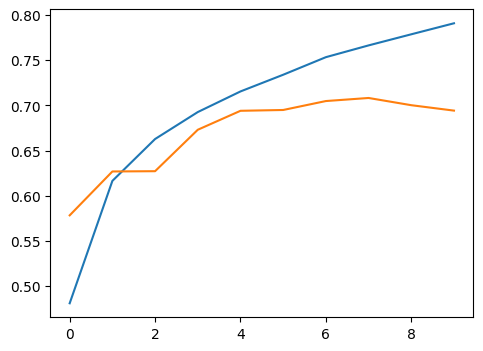

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'])
plt.plot(baseline_history.history['val_accuracy'])
plt.plot(improved_history.history['accuracy'])
plt.plot(improved_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Baseline Train', 'Baseline Test', 'Improved Train', 'Improved Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.plot(improved_history.history['loss'])
plt.plot(improved_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Baseline Train', 'Baseline Test', 'Improved Train', 'Improved Test'], loc='upper left')

plt.show()